In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load('final_pulsar_data.npy')

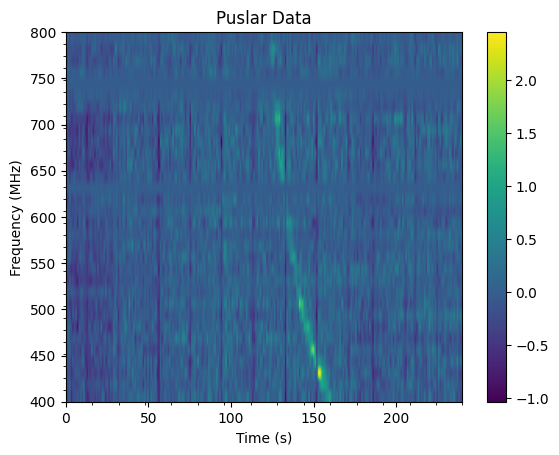

In [3]:
# Create the waterfall plot
fig, ax = plt.subplots()
time_bins = np.arange(0, data.shape[1], 16)
freq_bins = np.linspace(800, 400, num=32)

im = ax.imshow(data, extent=[time_bins[0], time_bins[-1], freq_bins[-1], freq_bins[0]], aspect='auto',cmap='viridis')

ax.set_title('Puslar Data')
ax.set_ylabel('Frequency (MHz)')
ax.set_xlabel('Time (s)')
ax.set_xticks(time_bins, minor=True)
ax.set_yticks(freq_bins, minor=True)

cbar = fig.colorbar(im)

plt.show()

In [4]:
def DMvar(DM):

    time_resolution = 16
    start_frequency = 800
    end_frequency = 400 
    num_frequency_bins = 32  
    num_time_bins = data.shape[1]

    time = np.arange(0, num_time_bins) * time_resolution
    frequency = np.linspace(start_frequency, end_frequency, num=num_frequency_bins)
    time_mesh, frequency_mesh = np.meshgrid(time, frequency)

    def delay(DM,v):
        return -(4.14*10**3)*DM*(v**(-2))*(1e3)  # return ms

    freq_channaels = np.linspace(400,800,32)
    delays = delay(DM,freq_channaels)
    frequency_shifts = np.array(delays)

    shifted_data = np.zeros_like(data)
    
    for i in range(num_frequency_bins):
        frequency_index = (num_frequency_bins - 1 - i)
        shift_samples = int(np.round(frequency_shifts[frequency_index] / time_resolution))
        shifted_data[i] = np.roll(data[i], shift_samples)

    return shifted_data, time_mesh, frequency_mesh, time

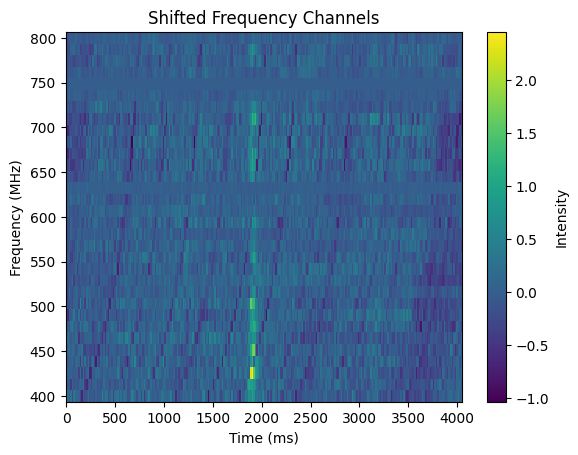

In [5]:
shifted_data, time_mesh, frequency_mesh, time = DMvar(30)

plt.pcolormesh(time_mesh, frequency_mesh, shifted_data, cmap='viridis')
plt.colorbar(label='Intensity')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (MHz)')
plt.title('Shifted Frequency Channels')
plt.show()

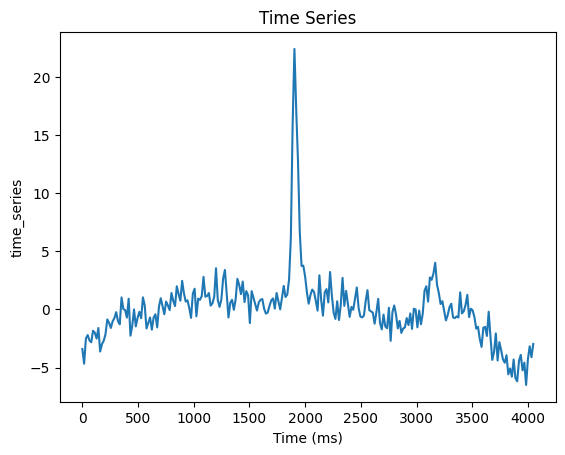

SNR = 7.4504128


In [6]:
# Time Series and SNR Calculation

time_series = np.sum(shifted_data, axis=0)
plt.plot(time, time_series)
plt.xlabel('Time (ms)')
plt.ylabel('time_series')
plt.title('Time Series')
plt.show()

SNR = np.max(time_series) / np.std(time_series)
print('SNR =', SNR)


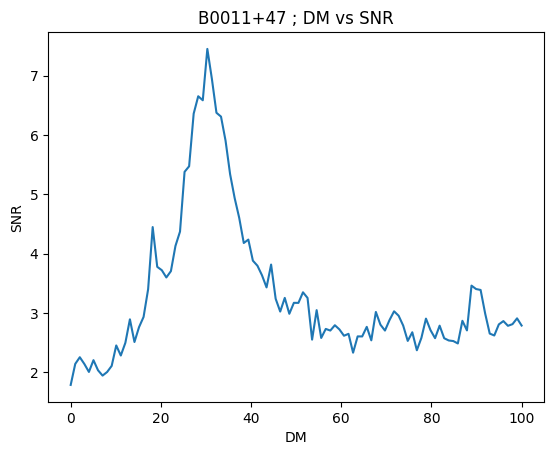

DM = 30.303030303030305
SNR = 7.4504128


In [7]:
# make a DM vs SNR plot
DMs = np.linspace(0,100,100)
SNRs = []
for i in range(0,100):
    shifted_data, time_mesh, frequency_mesh, time = DMvar(i)
    time_series = np.sum(shifted_data, axis=0)
    SNR = np.max(time_series) / np.std(time_series)
    SNRs.append(SNR)

plt.plot(DMs,SNRs)
plt.xlabel('DM')
plt.ylabel('SNR')
plt.title('B0011+47 ; DM vs SNR')
plt.show()

# print DM value where SNR is highest
print('DM =', DMs[np.argmax(SNRs)])
print('SNR =', np.max(SNRs))